In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_json("exps.jsonl", lines=True)
print(len(df))
df.head()

16


,id,name,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.model,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,workspace,None,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.5,ccot/format-thought.txt,cq.txt,manual/ccot.json,...,83,77,52.181818,16.257571,23,42.0,49.0,61.00,113,ccot
1,3f987e453aca4c146c3c81b20e66d59d2f92caf0,afoul-whin,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.5,cot/original.txt,cq.txt,manual/cot-original.json,...,171,89,77.303371,32.253049,22,52.0,71.0,93.00,169,cot
2,f7eba7eb006e754bb29f10e4b16b478d2ff3c852,wedgy-dais,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.5,ccot/format-thought.txt,cq.txt,manual/ccot.json,...,114,75,49.240000,17.650389,24,37.5,46.0,58.00,124,ccot
3,48fe0586899215bd65d11993cceeaea65c8daccf,heapy-dams,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.5,direct/format-few.txt,cq.txt,manual/direct.json,...,13,83,7.156627,5.586312,3,4.0,5.0,8.00,29,direct
4,workspace,None,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.5,direct/format-few.txt,cq.txt,manual/direct.json,...,33,178,8.078652,11.009728,1,4.0,5.0,7.75,70,direct


In [3]:
param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = [col for col in df.columns if col.startswith("metrics.")]
df.drop(
    columns=[
        "id",
        "name",
        "params.dataset.path",
        "params.dataset.name",
        "params.dataset.split",
        "params.qa.model",
    ],
    inplace=True,
)

In [4]:
target_param_cols = [
    "params.qa.technique",
    "params.qa.system_prompt",
    "params.qa.user_prompt_template",
    "params.qa.few_shot_examples",
    "params.qa.n_shot",
    "params.qa.temperature",
]
df = df.sort_values(target_param_cols + ["params.run"])
df.reset_index(drop=True, inplace=True)
df.head()

,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.run,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,0.5,ccot/format-thought.txt,cq.txt,manual/ccot.json,0,1,0.643333,0.751388,0.71,0.816722,...,114,75,49.240000,17.650389,24,37.50,46.0,58.00,124,ccot
1,0.5,ccot/format-thought.txt,cq.txt,manual/ccot.json,1,1,0.096667,0.112519,0.16,0.175556,...,216,265,25.245283,36.676052,2,11.00,15.0,25.00,293,ccot
2,0.5,ccot/format-thought.txt,cq.txt,manual/ccot.json,2,1,0.653333,0.749813,0.74,0.835071,...,83,77,52.181818,16.257571,23,42.00,49.0,61.00,113,ccot
3,0.5,cot/format-thought.txt,cq.txt,manual/cot.json,0,1,0.633333,0.728828,0.72,0.819722,...,207,84,69.559524,31.678867,31,49.75,65.0,80.25,246,cot
4,0.5,cot/format-thought.txt,cq.txt,manual/cot.json,1,1,0.613333,0.708580,0.67,0.780417,...,120,88,67.693182,27.839176,31,48.00,64.5,80.00,194,cot


In [5]:
run_counts = df.groupby(target_param_cols)["params.run"].aggregate(tuple).reset_index()
mask = run_counts["params.run"].map(len) != 3
run_counts.loc[mask]

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.temperature,params.run
0,ccot,ccot/format-thought.txt,cq.txt,manual/ccot.json,0,0.5,"(1,)"
1,ccot,ccot/format-thought.txt,cq.txt,manual/ccot.json,1,0.5,"(1,)"
2,ccot,ccot/format-thought.txt,cq.txt,manual/ccot.json,2,0.5,"(1,)"
3,cot,cot/format-thought.txt,cq.txt,manual/cot.json,0,0.5,"(1,)"
4,cot,cot/format-thought.txt,cq.txt,manual/cot.json,1,0.5,"(1,)"
5,cot,cot/format-thought.txt,cq.txt,manual/cot.json,2,0.5,"(1,)"
6,cot,cot/original.txt,cq.txt,manual/cot-original.json,0,0.5,"(1,)"
7,cot,cot/original.txt,cq.txt,manual/cot-original.json,1,0.5,"(1,)"
8,cot,cot/original.txt,cq.txt,manual/cot-original.json,2,0.5,"(1,)"
9,cte,cte/format-triplets-few.txt,cq.txt,manual/cte.json,0,0.5,"(1,)"


In [6]:
def remove_ext(filename):
    return filename.split(".", 1)[0]

df["params.qa.system_prompt"] = df["params.qa.system_prompt"].map(remove_ext)
df["params.qa.user_prompt_template"] = df["params.qa.user_prompt_template"].map(remove_ext)
df["params.qa.few_shot_examples"] = df["params.qa.few_shot_examples"].map(remove_ext)

In [7]:
df['params.qa.system_prompt'].unique()

array(['ccot/format-thought', 'cot/format-thought', 'cot/original',
       'cte/format-triplets-few', 'direct/format-few'], dtype=object)

In [8]:
avg_df = df.groupby(target_param_cols)[metric_cols].mean().reset_index()
avg_df.head()

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,...,metrics.gen_token_count.success.75%,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max
0,ccot,ccot/format-thought,cq,manual/ccot,0,0.5,0.643333,0.751388,0.71,0.816722,...,52.0,114.0,75.0,49.240000,17.650389,24.0,37.50,46.0,58.00,124.0
1,ccot,ccot/format-thought,cq,manual/ccot,1,0.5,0.096667,0.112519,0.16,0.175556,...,42.0,216.0,265.0,25.245283,36.676052,2.0,11.00,15.0,25.00,293.0
2,ccot,ccot/format-thought,cq,manual/ccot,2,0.5,0.653333,0.749813,0.74,0.835071,...,51.5,83.0,77.0,52.181818,16.257571,23.0,42.00,49.0,61.00,113.0
3,cot,cot/format-thought,cq,manual/cot,0,0.5,0.633333,0.728828,0.72,0.819722,...,68.0,207.0,84.0,69.559524,31.678867,31.0,49.75,65.0,80.25,246.0
4,cot,cot/format-thought,cq,manual/cot,1,0.5,0.613333,0.708580,0.67,0.780417,...,68.0,120.0,88.0,67.693182,27.839176,31.0,48.00,64.5,80.00,194.0


In [9]:
# find the rows with max f1 score for each technique group
max_f1_rows = avg_df.groupby('params.qa.technique')["metrics.f1"].idxmax()
best_df = avg_df.loc[max_f1_rows, target_param_cols + metric_cols].sort_values('metrics.f1', ascending=False)
best_df

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,...,metrics.gen_token_count.success.75%,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max
11,cte,cte/format-triplets-few,cq,manual/cte,2,0.5,0.720000,0.788898,0.78,0.844294,...,50.25,101.0,64.0,46.250000,13.009154,23.0,36.75,44.0,55.0,85.0
0,ccot,ccot/format-thought,cq,manual/ccot,0,0.5,0.643333,0.751388,0.71,0.816722,...,52.00,114.0,75.0,49.240000,17.650389,24.0,37.50,46.0,58.0,124.0
7,cot,cot/original,cq,manual/cot-original,1,0.5,0.653333,0.741204,0.76,0.832500,...,74.00,196.0,83.0,70.795181,36.611593,21.0,43.00,59.0,91.0,183.0
14,direct,direct/format-few,cq,manual/direct,2,0.5,0.643333,0.735738,0.74,0.839452,...,6.00,11.0,81.0,6.962963,6.400087,3.0,4.00,5.0,8.0,50.0


## Visualizations

In [10]:
def prepare_data(dataf):
    # Simplify column names for use in formula
    dataf = dataf[target_param_cols + ['params.run'] + metric_cols[:2]].rename(
        columns={
            col: col.replace("params.qa.", "").replace("params.", "").replace("metrics.", "")
            for col in dataf.columns
        }
    )

    # Combine prompts into a single column for simplicity
    dataf["prompt"] = (
        dataf["system_prompt"]
        + " | "
        + dataf["user_prompt_template"]
        + " | "
        + dataf["n_shot"].map(str)
    )

    return dataf


In [11]:
def plot_variance(dataf, x='temperature', y='f1', hue='prompt', technique=None, figsize=(12, 8), legend='auto', legend_loc='lower left'):  
    if technique:
        dataf = dataf[dataf['technique'] == technique]
    plt.figure(figsize=figsize)
    sns.lineplot(x=x, y=y, hue=hue, data=dataf, linewidth=2.5, legend=legend)
    plt.xlabel(x.title())
    plt.ylabel(y.title())
    if legend:
        plt.legend(loc=legend_loc)
    plt.tight_layout()
    plt.show()

In [12]:
prepared_df = prepare_data(df)
zero_shot_mask = prepared_df["n_shot"] == 0
prepared_df

,technique,system_prompt,user_prompt_template,few_shot_examples,n_shot,temperature,run,exact_match,f1,prompt
0,ccot,ccot/format-thought,cq,manual/ccot,0,0.5,1,0.643333,0.751388,ccot/format-thought | cq | 0
1,ccot,ccot/format-thought,cq,manual/ccot,1,0.5,1,0.096667,0.112519,ccot/format-thought | cq | 1
2,ccot,ccot/format-thought,cq,manual/ccot,2,0.5,1,0.653333,0.749813,ccot/format-thought | cq | 2
3,cot,cot/format-thought,cq,manual/cot,0,0.5,1,0.633333,0.728828,cot/format-thought | cq | 0
4,cot,cot/format-thought,cq,manual/cot,1,0.5,1,0.613333,0.708580,cot/format-thought | cq | 1
5,cot,cot/format-thought,cq,manual/cot,2,0.5,1,0.620000,0.730091,cot/format-thought | cq | 2
6,cot,cot/original,cq,manual/cot-original,0,0.5,1,0.616667,0.731113,cot/original | cq | 0
7,cot,cot/original,cq,manual/cot-original,1,0.5,1,0.653333,0.741204,cot/original | cq | 1
8,cot,cot/original,cq,manual/cot-original,2,0.5,1,0.616667,0.710735,cot/original | cq | 2
9,cte,cte/format-triplets-few,cq,manual/cte,0,0.5,1,0.683333,0.764635,cte/format-triplets-few | cq | 0


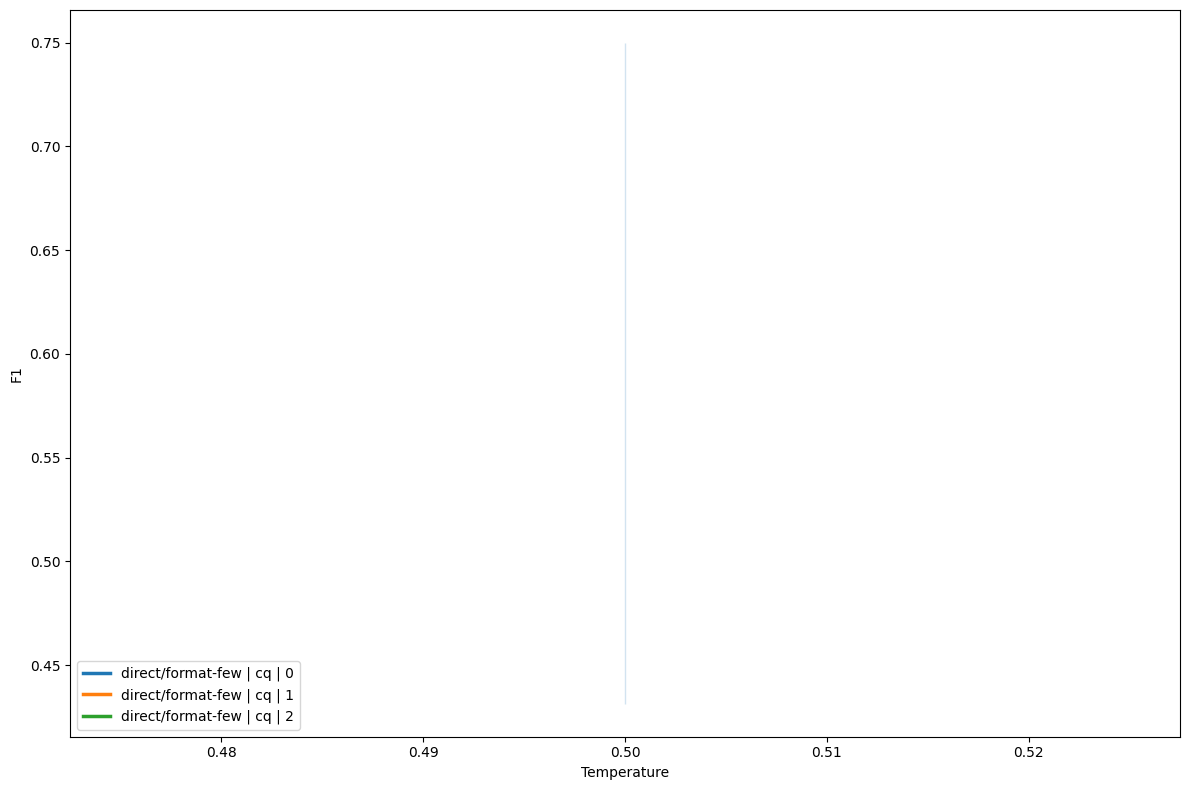

In [13]:
plot_variance(prepared_df, technique='direct', legend='brief')

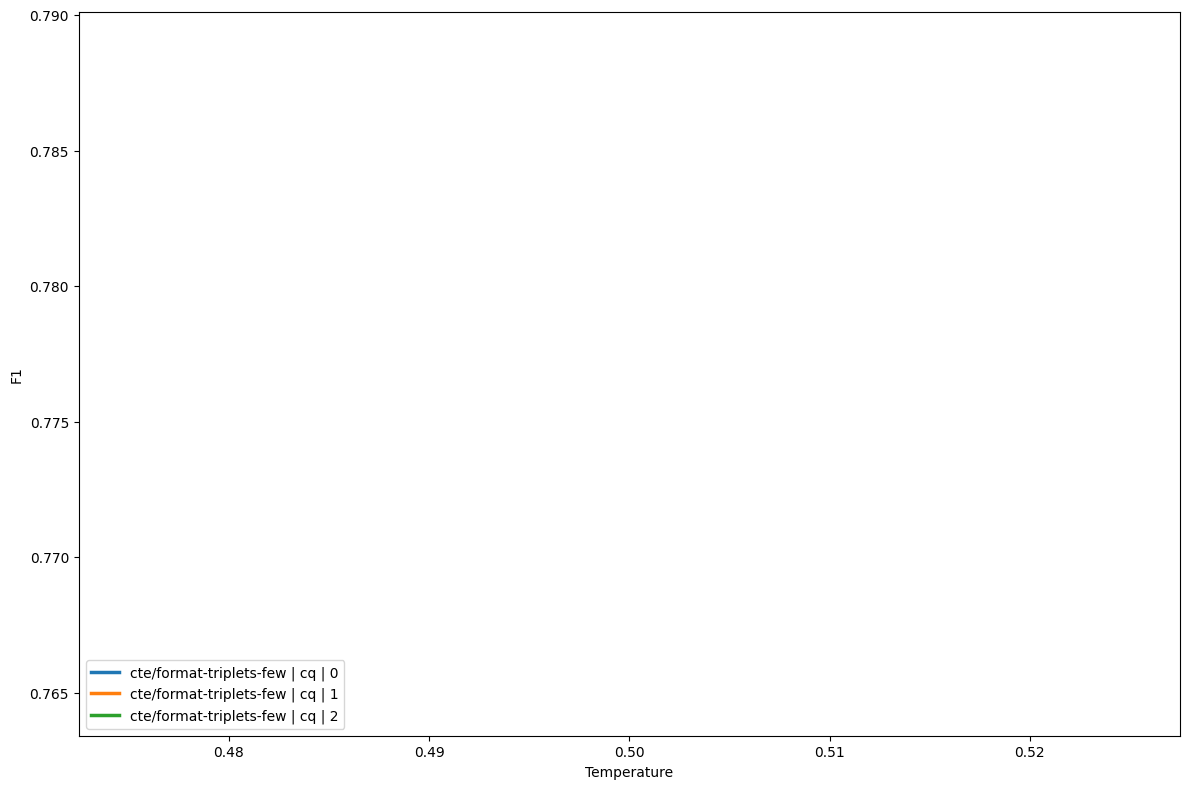

In [14]:
plot_variance(prepared_df, technique='cte', legend='brief')

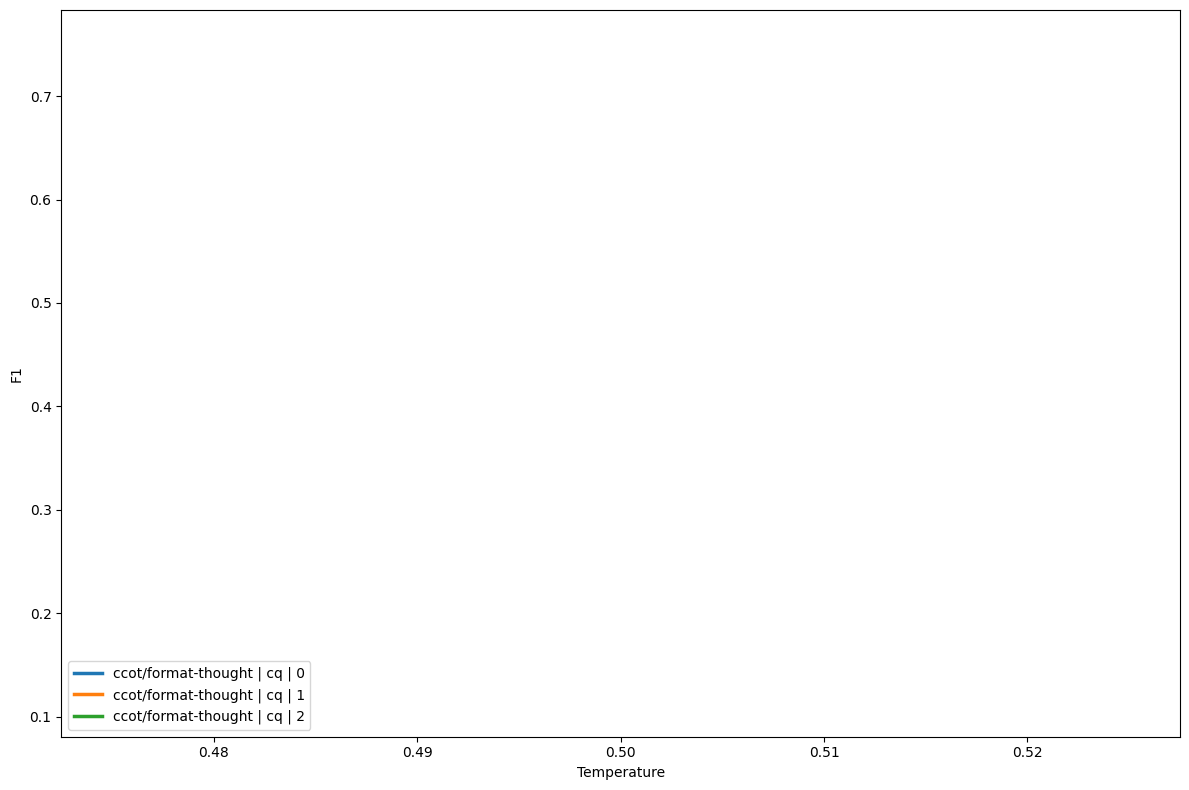

In [15]:
plot_variance(prepared_df, technique='ccot', legend='brief')

In [16]:
best_df['params.run'] = 0
best_prompts = prepare_data(best_df).prompt.values.tolist()
_data = prepared_df.copy()
prompt_mask = _data['prompt'].isin(best_prompts)
best_prepared_df = _data.loc[prompt_mask]
best_prepared_df

,technique,system_prompt,user_prompt_template,few_shot_examples,n_shot,temperature,run,exact_match,f1,prompt
0,ccot,ccot/format-thought,cq,manual/ccot,0,0.5,1,0.643333,0.751388,ccot/format-thought | cq | 0
7,cot,cot/original,cq,manual/cot-original,1,0.5,1,0.653333,0.741204,cot/original | cq | 1
11,cte,cte/format-triplets-few,cq,manual/cte,2,0.5,1,0.720000,0.788898,cte/format-triplets-few | cq | 2
15,direct,direct/format-few,cq,manual/direct,2,0.5,1,0.643333,0.735738,direct/format-few | cq | 2


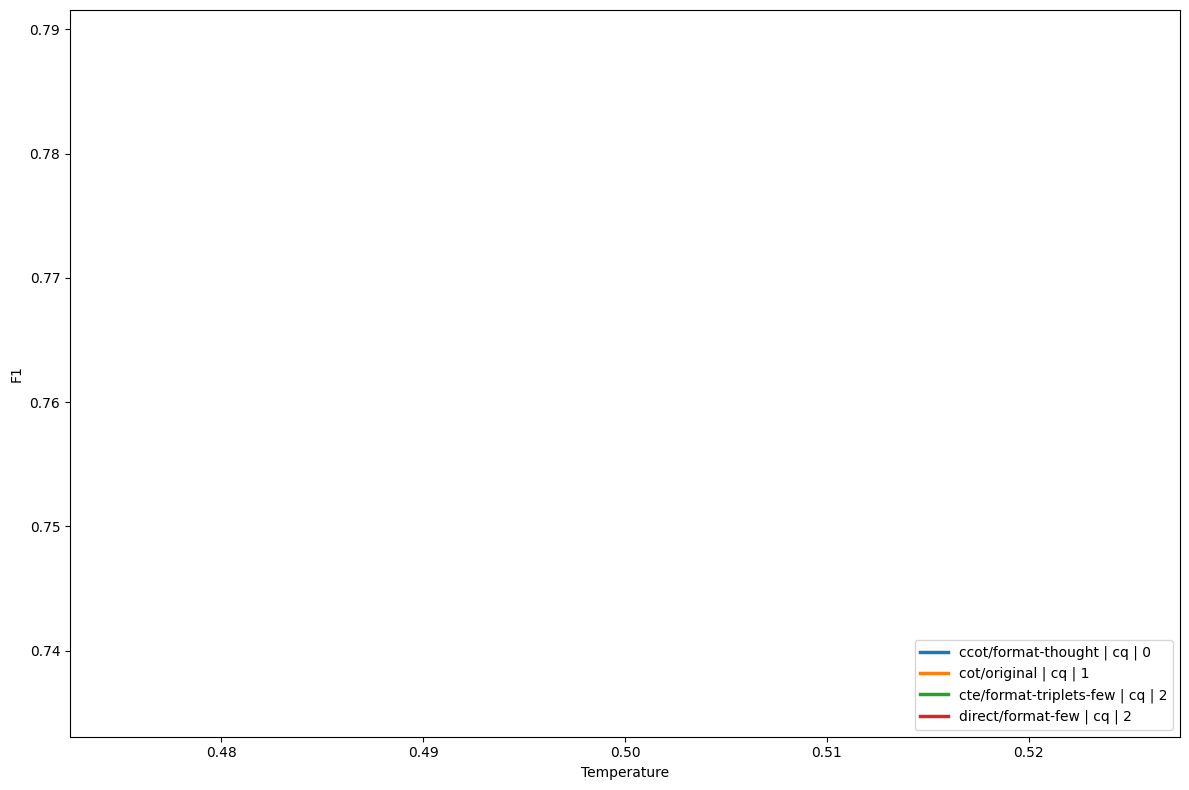

In [17]:
plot_variance(best_prepared_df, figsize=(12, 8), legend_loc='lower right')

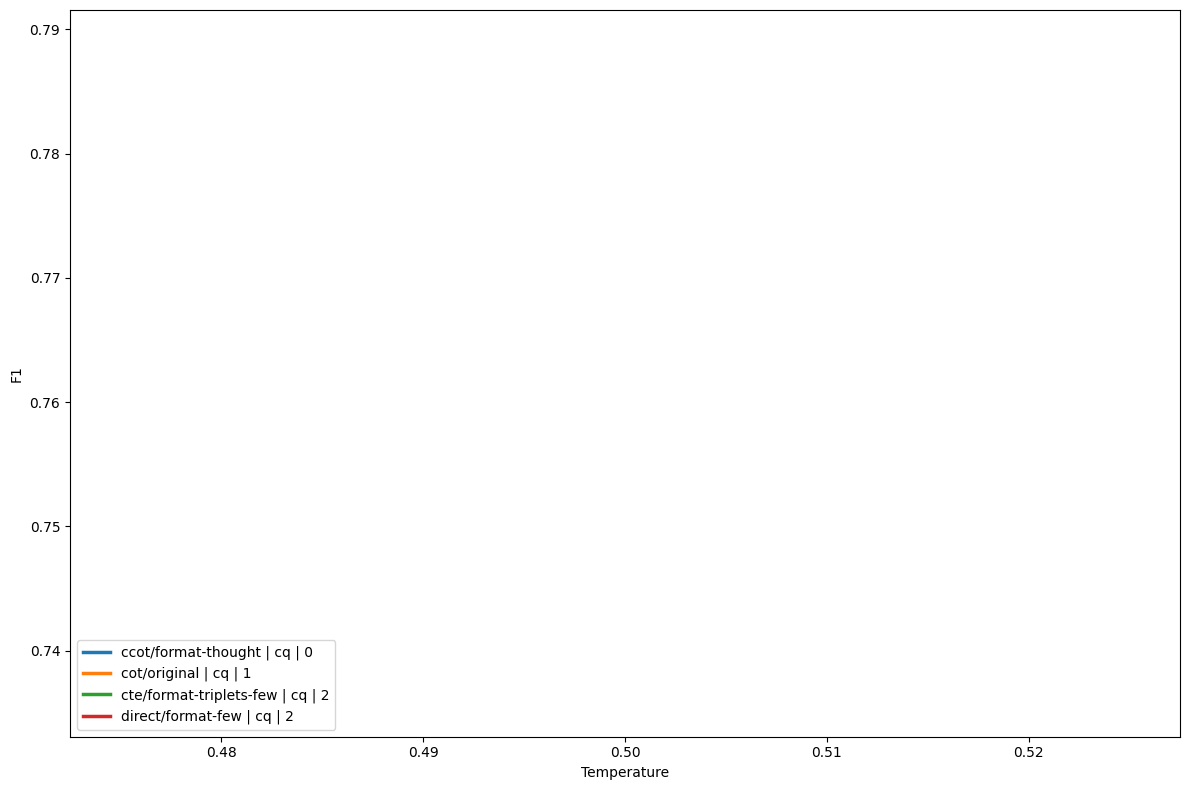

In [18]:
plot_variance(best_prepared_df, figsize=(12, 8), legend_loc='lower left')

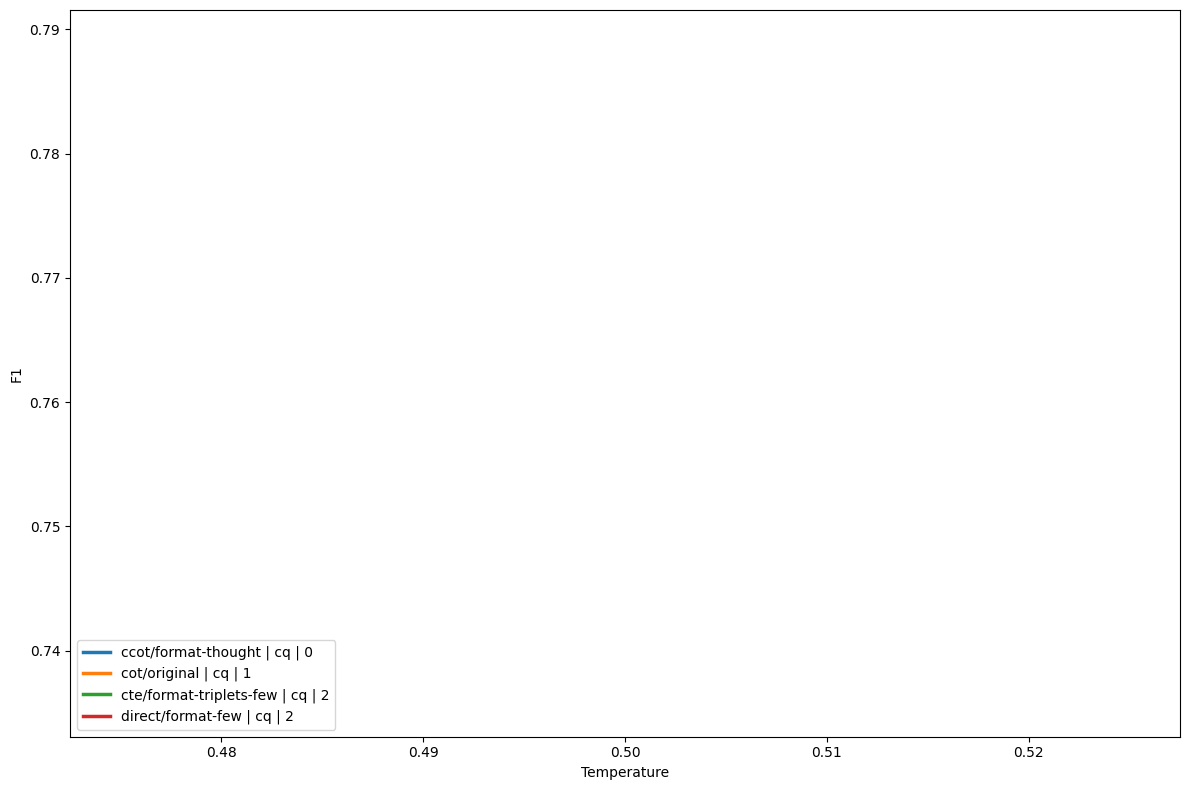

In [19]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], figsize=(12, 8), legend_loc='lower left')

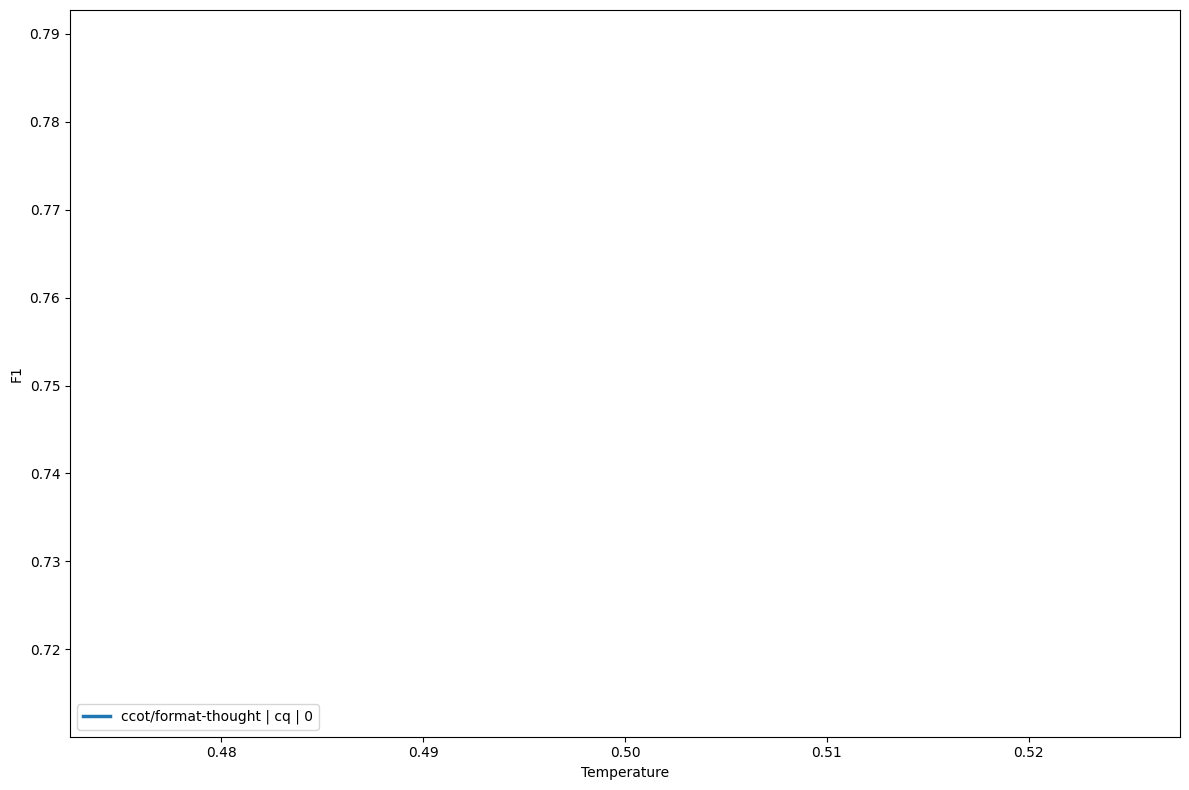

In [20]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], technique='ccot', figsize=(12, 8), legend_loc='lower left')

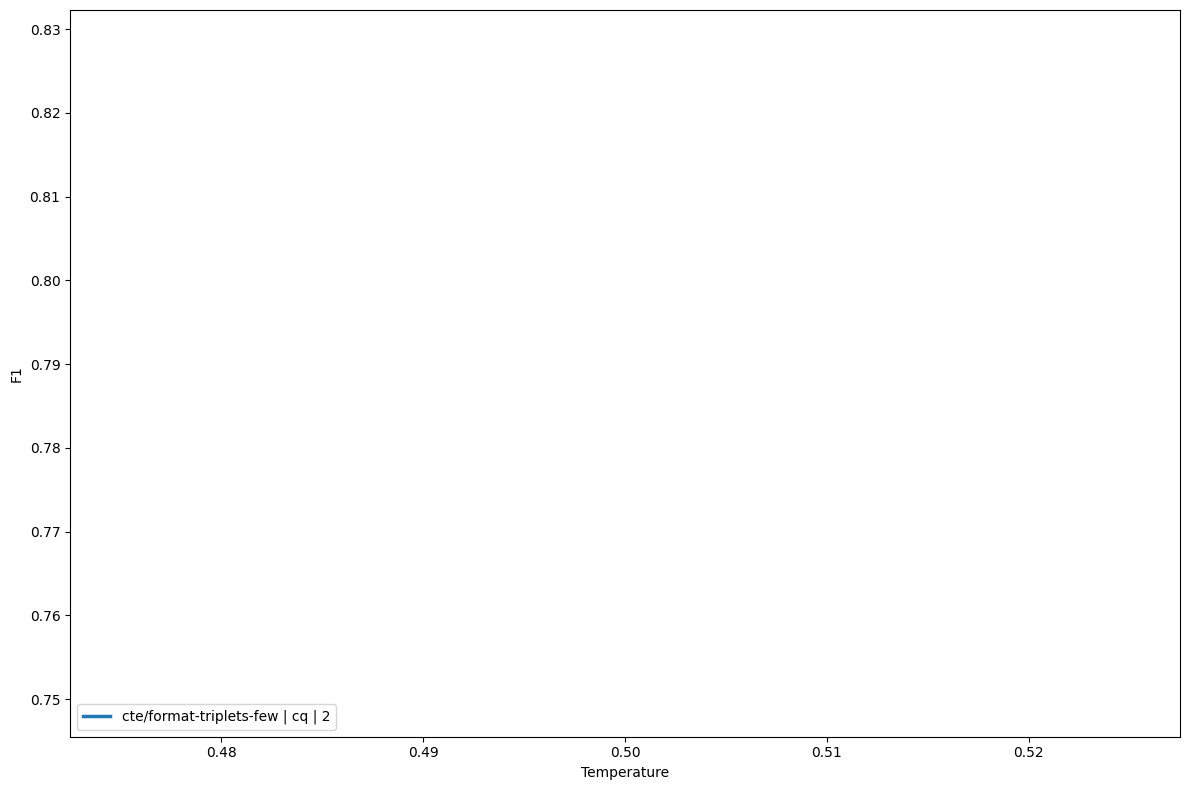

In [21]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], technique='cte', figsize=(12, 8), legend_loc='lower left')

## Inspect

In [22]:
# # box-whisker plot
# plt.figure(figsize=(12, 8))
# sns.boxplot(
#     x="prompt",
#     y="f1",
#     data=prepared_df.sort_values(by="f1"),
# )
# plt.xticks(rotation=60, ha="right");

/tmp/ipykernel_846509/1818533546.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=legend_loc)


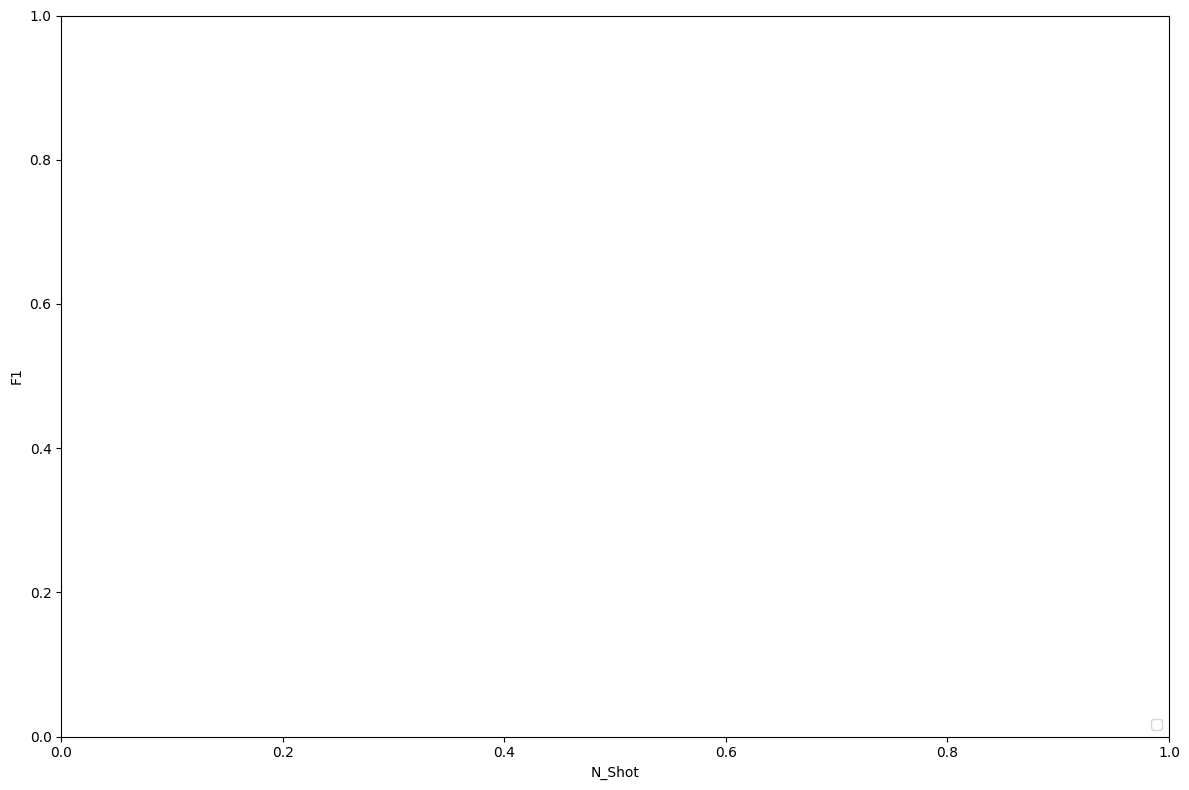

In [23]:
plot_variance(prepared_df[prepared_df['temperature'] == 0.1], x='n_shot', hue='technique', figsize=(12, 8), legend_loc='lower right')

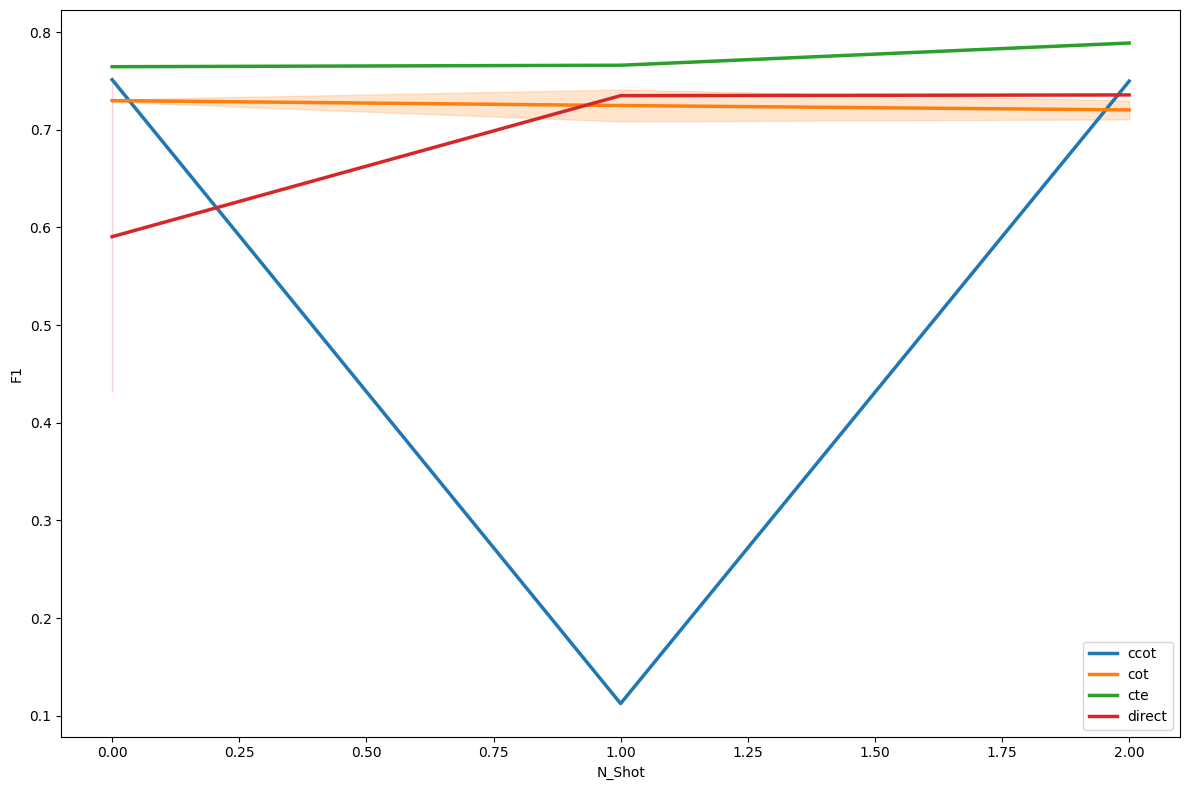

In [24]:
plot_variance(prepared_df[prepared_df['temperature'] < 1.0], x='n_shot', hue='technique', figsize=(12, 8), legend_loc='lower right')

In [25]:
df

,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.run,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,0.5,ccot/format-thought,cq,manual/ccot,0,1,0.643333,0.751388,0.71,0.816722,...,114,75,49.240000,17.650389,24,37.50,46.0,58.00,124,ccot
1,0.5,ccot/format-thought,cq,manual/ccot,1,1,0.096667,0.112519,0.16,0.175556,...,216,265,25.245283,36.676052,2,11.00,15.0,25.00,293,ccot
2,0.5,ccot/format-thought,cq,manual/ccot,2,1,0.653333,0.749813,0.74,0.835071,...,83,77,52.181818,16.257571,23,42.00,49.0,61.00,113,ccot
3,0.5,cot/format-thought,cq,manual/cot,0,1,0.633333,0.728828,0.72,0.819722,...,207,84,69.559524,31.678867,31,49.75,65.0,80.25,246,cot
4,0.5,cot/format-thought,cq,manual/cot,1,1,0.613333,0.708580,0.67,0.780417,...,120,88,67.693182,27.839176,31,48.00,64.5,80.00,194,cot
5,0.5,cot/format-thought,cq,manual/cot,2,1,0.620000,0.730091,0.68,0.801214,...,167,82,75.158537,29.114703,37,55.00,70.5,86.00,164,cot
6,0.5,cot/original,cq,manual/cot-original,0,1,0.616667,0.731113,0.71,0.832381,...,148,80,68.125000,24.914728,25,48.75,67.0,82.75,141,cot
7,0.5,cot/original,cq,manual/cot-original,1,1,0.653333,0.741204,0.76,0.832500,...,196,83,70.795181,36.611593,21,43.00,59.0,91.00,183,cot
8,0.5,cot/original,cq,manual/cot-original,2,1,0.616667,0.710735,0.70,0.793750,...,171,89,77.303371,32.253049,22,52.00,71.0,93.00,169,cot
9,0.5,cte/format-triplets-few,cq,manual/cte,0,1,0.683333,0.764635,0.75,0.823829,...,110,73,58.835616,23.669022,7,42.00,54.0,71.00,149,cte
